<center> <h1> Superstore Sales Data Analysis </h1> </center>

![](https://as2.ftcdn.net/v2/jpg/02/78/37/33/1000_F_278373358_25gUoss2GtX0KJa8kJQmNcp872u6dTxW.jpg)

## Problem Statement

- You are the manager of **EasyGrab** whose job is manage all the branches of the superstore.
- The sales have been **decreasing for the past quarter** and we need to **increase** them in order to **meet the targets** for the year.
- You are responsible to find out which **category and segment** should be focussed on more.
- Goal is to **increase sales by 30%** over the next quarter through targeted marketing campaigns and improved sales techniques.
- This will focus on **identifying target markets, creating marketing materials** and campaigns to **reach those markets**, and **training our sales team** on how to effectively sell to those customers.

**Constraints:**

- Budget: We have a **limited budget** for marketing campaigns and sales team training.
- Time: We only have a **few weeks to implement** these changes before the end of the quarter.

**Success Criteria:**

- **Increase in sales** revenue by 30% over the next quarter.
- Positive **feedback from customers** and sales team on marketing campaigns and sales techniques.
- **Cost-effective use of budget** for marketing and sales team training.

In [1]:
#importing all the relevant libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100

In [3]:
#reading the data using pandas
df = pd.read_csv('/kaggle/input/superstore-sales-dataset/SuperStoreOrders.csv', parse_dates=['order_date', 'ship_date'])

In [4]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

In [6]:
#Converting Sales Column to numeric data
df['sales'] = pd.to_numeric(df['sales'].apply(lambda x:x.replace(',', '').strip()))

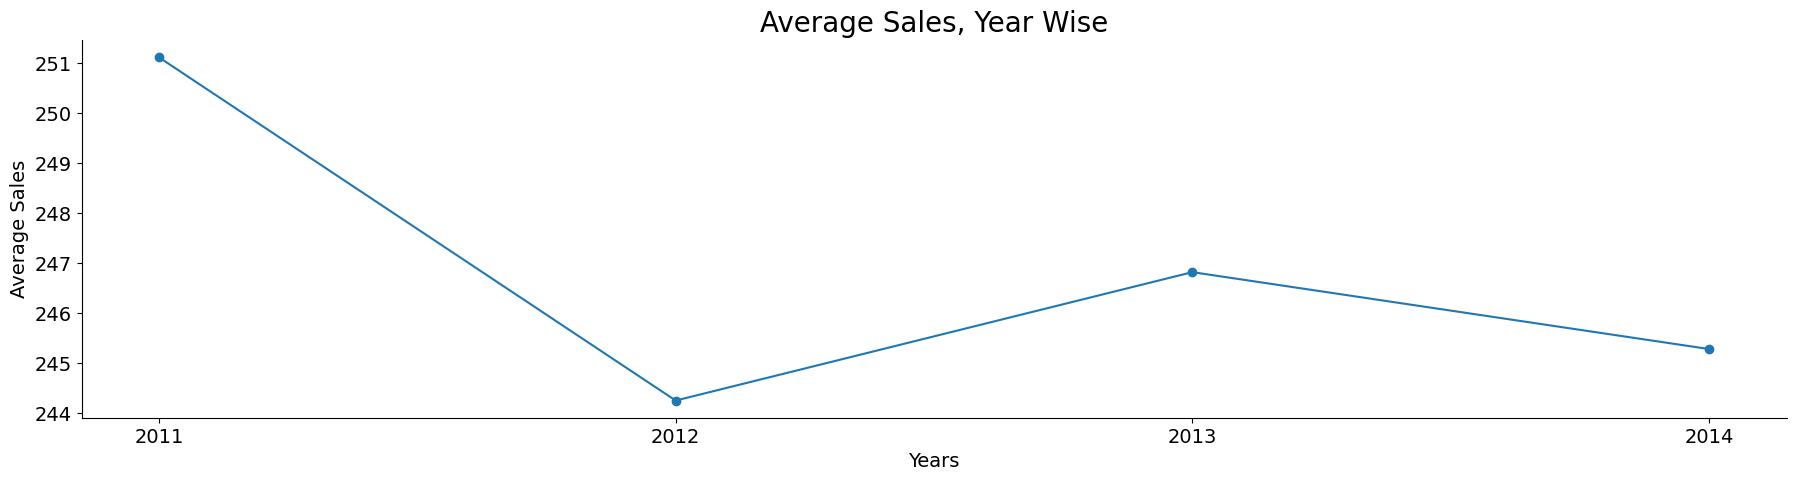

In [7]:
#grouping the data by year and fetching average sales and plotting
df.groupby(df.order_date.dt.year).mean()['sales'].plot(marker='o')

#adding xlabel and ylabel and title to the chart
plt.xlabel('Years')
plt.ylabel('Average Sales')
plt.title('Average Sales, Year Wise', fontsize=20)

#remove the top and right spines of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#setting the x-axis ticks
plt.xticks(list(df.groupby(df.order_date.dt.year).mean().index))

#show the plot
plt.show()

**Observations**

- There is a downward trend in Sales over the years.

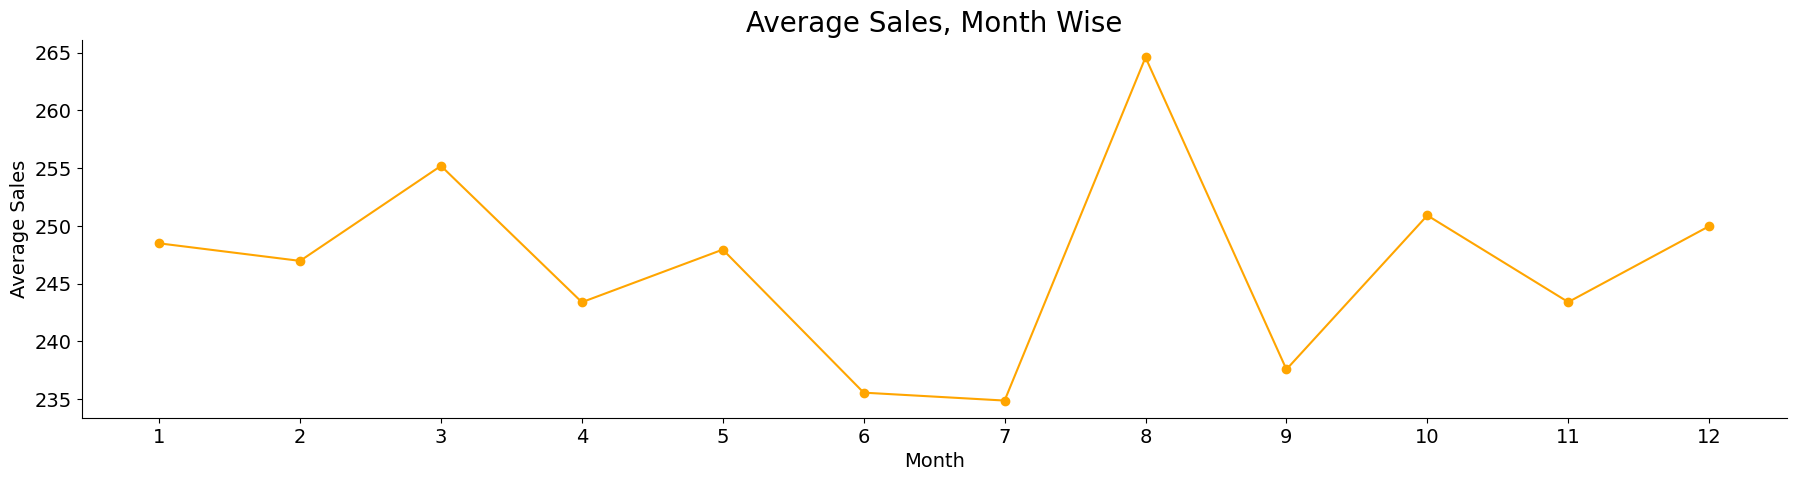

In [8]:
#grouping the data by month and geting the average sales
df.groupby(df.order_date.dt.month).mean()['sales'].plot(marker='o', color='orange')

#adding xlabel and ylabel and title to the chart
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales, Month Wise', fontsize=20)

#remove the top and right spines of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#setting the x-axis ticks
plt.xticks(list(df.order_date.dt.month.unique()))

#show the plot
plt.show()

**Observations**
 
-  Sales in the 8th Month is the highest while lowest in the 7th month.

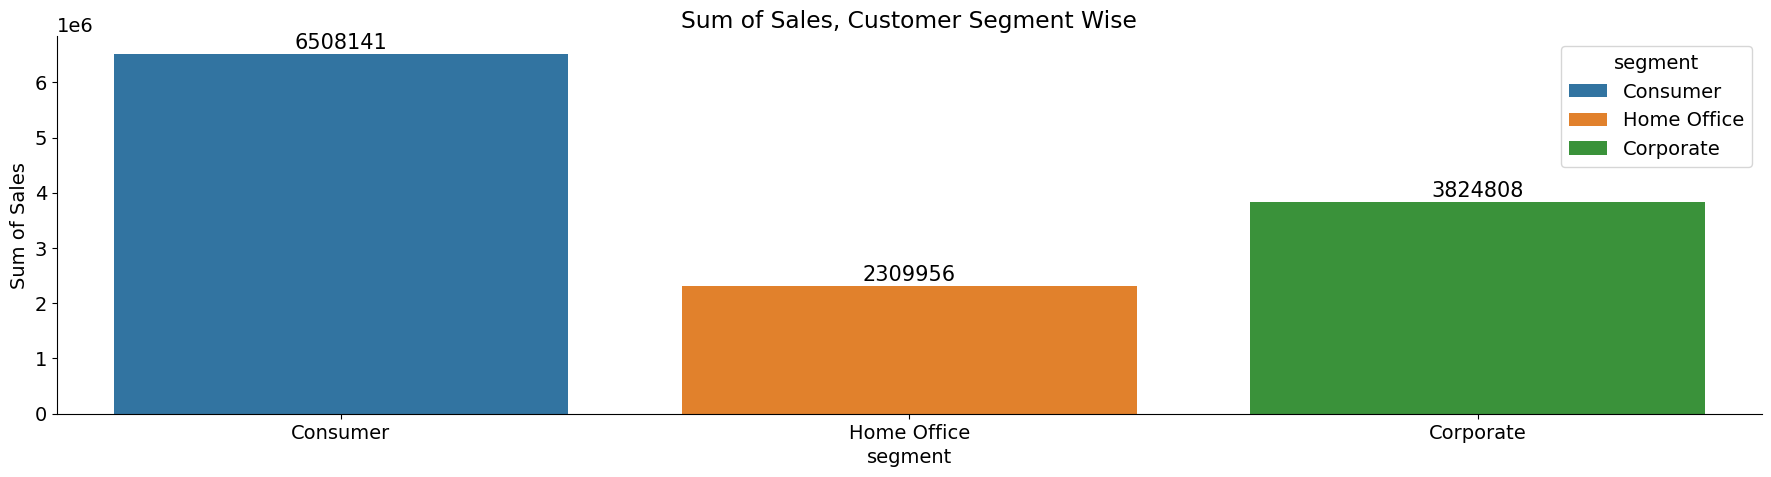

In [9]:
# Create a bar plot to visualize the sum of sales by customer segment
ax = sns.barplot(data=df, x='segment', y='sales', hue='segment', estimator=sum, dodge=False, ci=None)

# remove the top and right borders from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Give the plot a title
plt.title('Sum of Sales, Customer Segment Wise')

# Convert the sales values on the plot to integer values
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

#Label the y-axis
plt.ylabel('Sum of Sales')

# finally show the plot
plt.show()

**Observations**

- Sum of Sales is the highest in Consumer Segment and the lowest in the Home Office Segment.

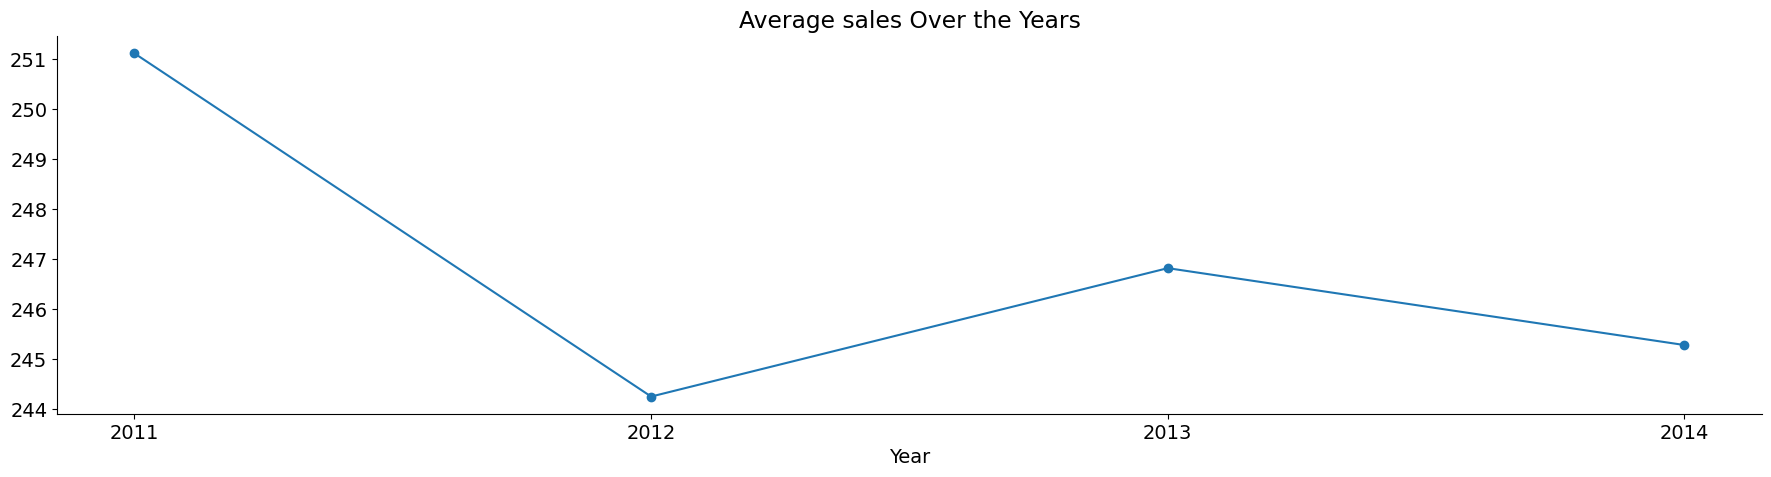

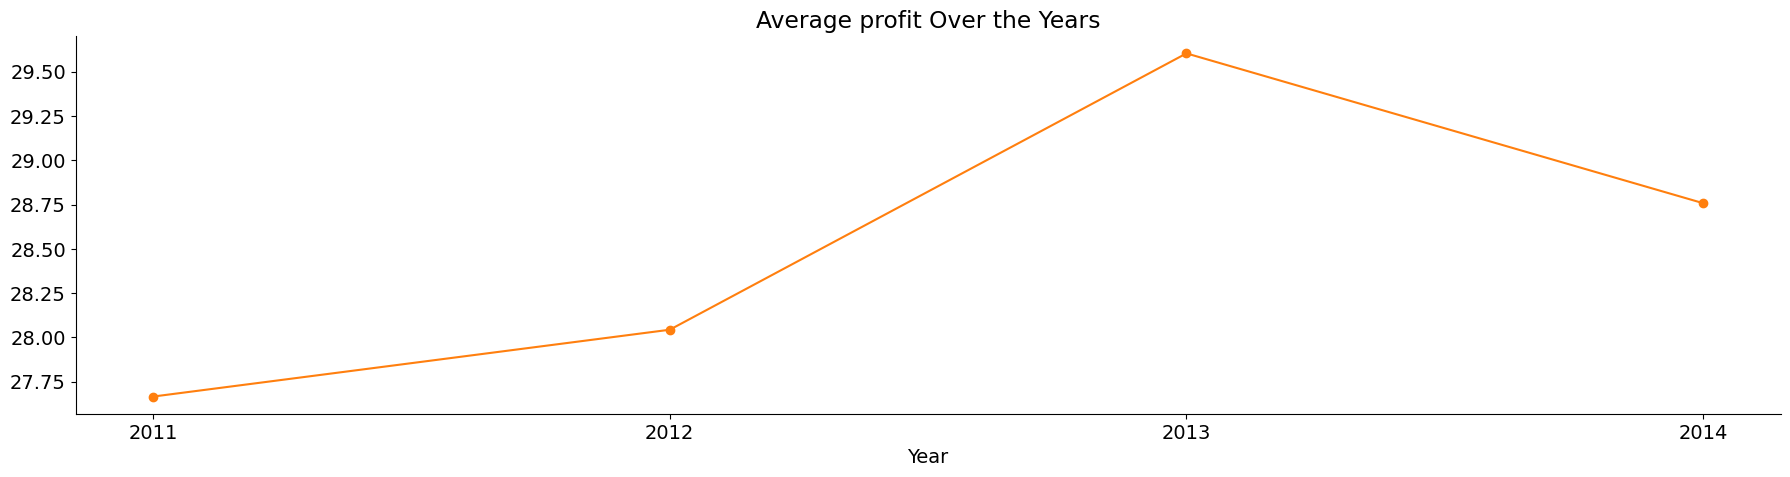

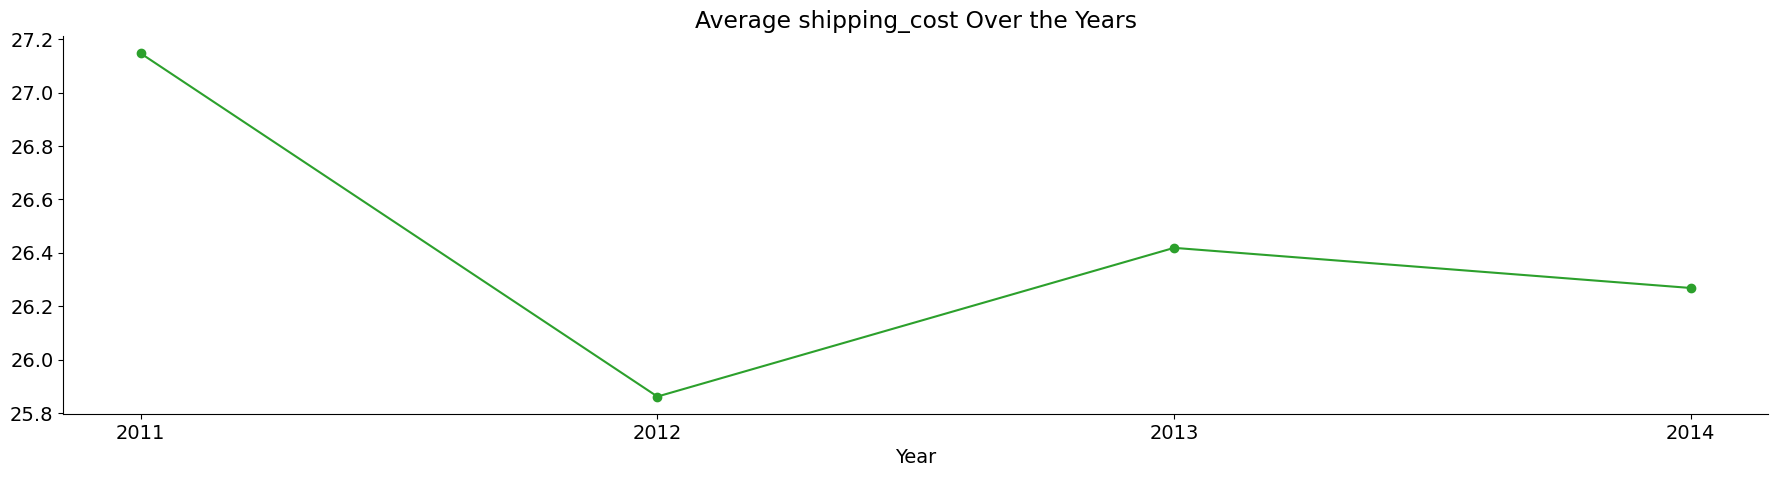

In [10]:
colors = plt.rcParams["axes.prop_cycle"]()

# This creates a list of the three columns we are interested in analyzing
# which are sales, profit and shipping_cost 
columns = ['sales', 'profit', 'shipping_cost']

# This for loop iterates over the three columns we have and creates a single plot for each column
# This also set the color cycle using plt.rcParams["axes.prop_cycle"]()
for i in columns:
    color = next(colors)["color"]
    
    #Grouping the data on the basis of year and getting the mean for all the columns picked
    ax = df.groupby(df.order_date.dt.year).mean()[i].plot(marker='o', color=color)

   # The set the title of the plot, xlabel and set the top and right border of the plot invisible
    plt.title(f'Average {i} Over the Years')
    plt.xlabel('Year')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # set the x-ticks of the plot to be the year values
    plt.xticks(list(df.groupby(df.order_date.dt.year).mean().index))
    #Show the plot
    plt.show()

**Observations**

- All three values, Sales, Profit and Shipping Cost has decreased over the years.

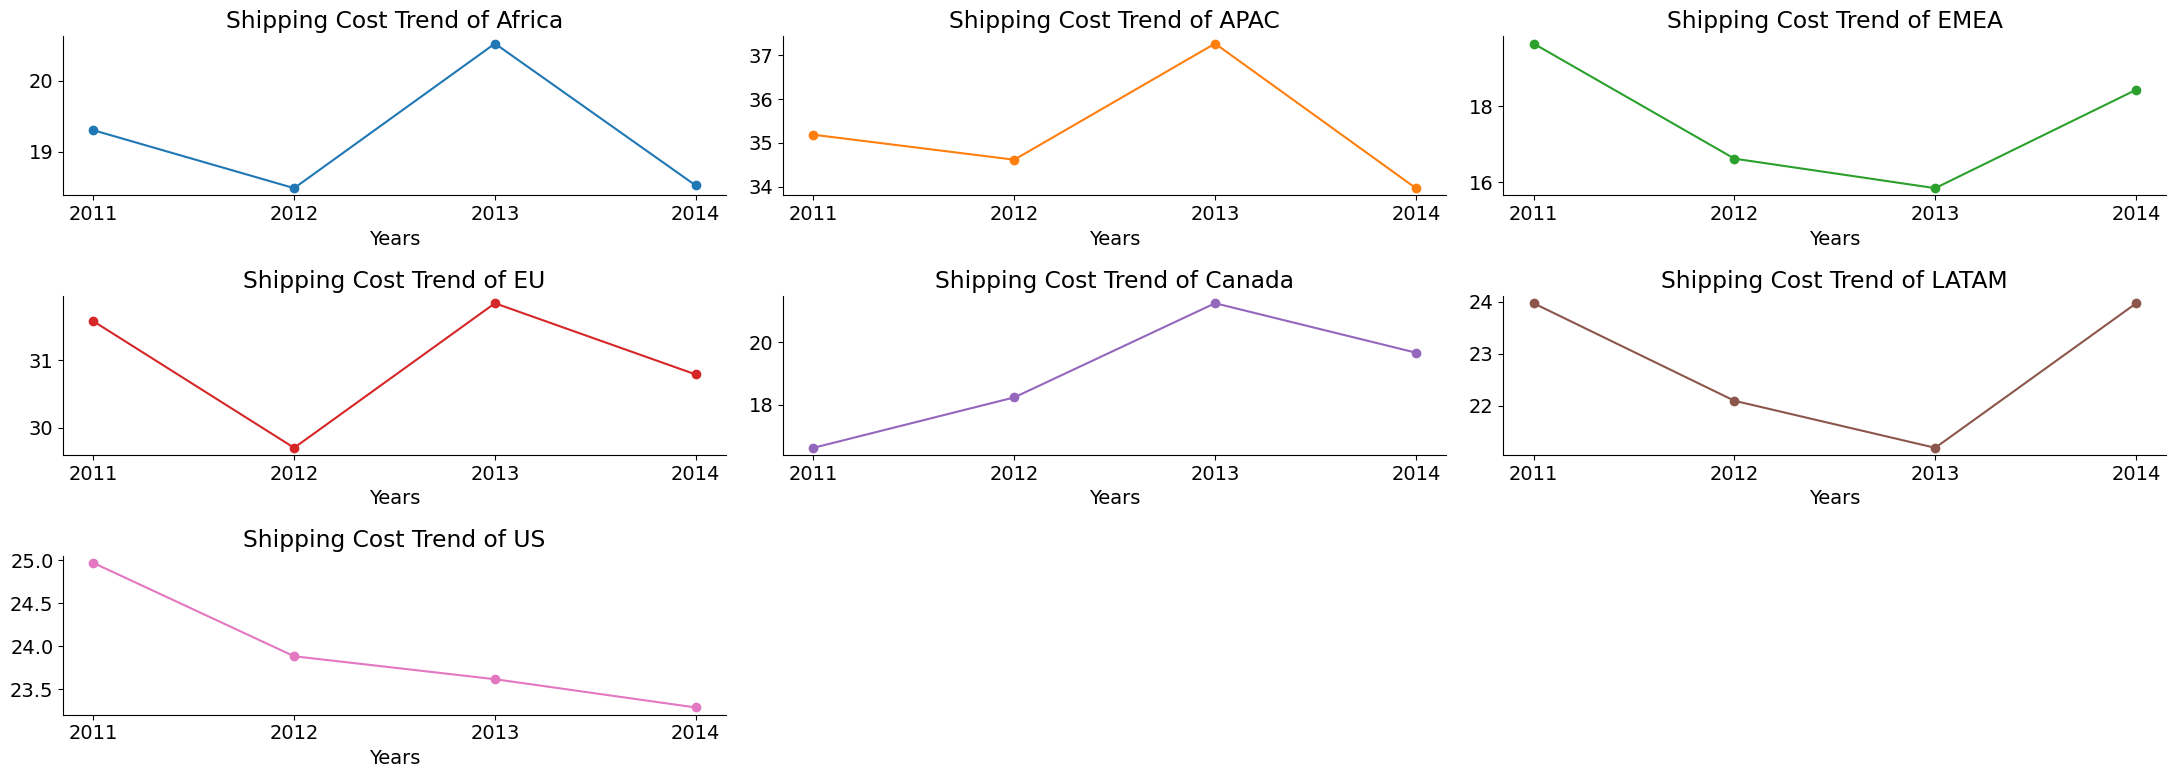

In [11]:
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Accessing the color cycle used for plotting 
colors = plt.rcParams["axes.prop_cycle"]()

#Set the figure size of the plot
fig = plt.figure(figsize=(22,8))

#Creating a list of the markets
markets = list(df['market'].unique())

#loop through the list of markets
for i in markets:
    plt.subplot(a, b, c)  
    color = next(colors)["color"]
    #Grouping the data for each market by Order Date Year and plotting the shipping cost
    df[df.market==i].groupby(df.order_date.dt.year).mean()['shipping_cost'].plot(color=color, marker='o')
    
    #addoing title and x axis label
    plt.title(f'Shipping Cost Trend of {i}')
    plt.xlabel('Years')
    
    #remove the top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #setting the x axis ticks
    plt.xticks(ticks=list(df.order_date.dt.year.unique()))
    
    #Adding the data labels
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', 
                    va='center',size=15, xytext=(0, 8),textcoords='offset points')
        
    #Increase the counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

**Observations**

- In US Market, the Shipping Cost has went down each year.
- In LATAM and EMEA Market, has started to increase since 2013 but in other markets, it has decreased.

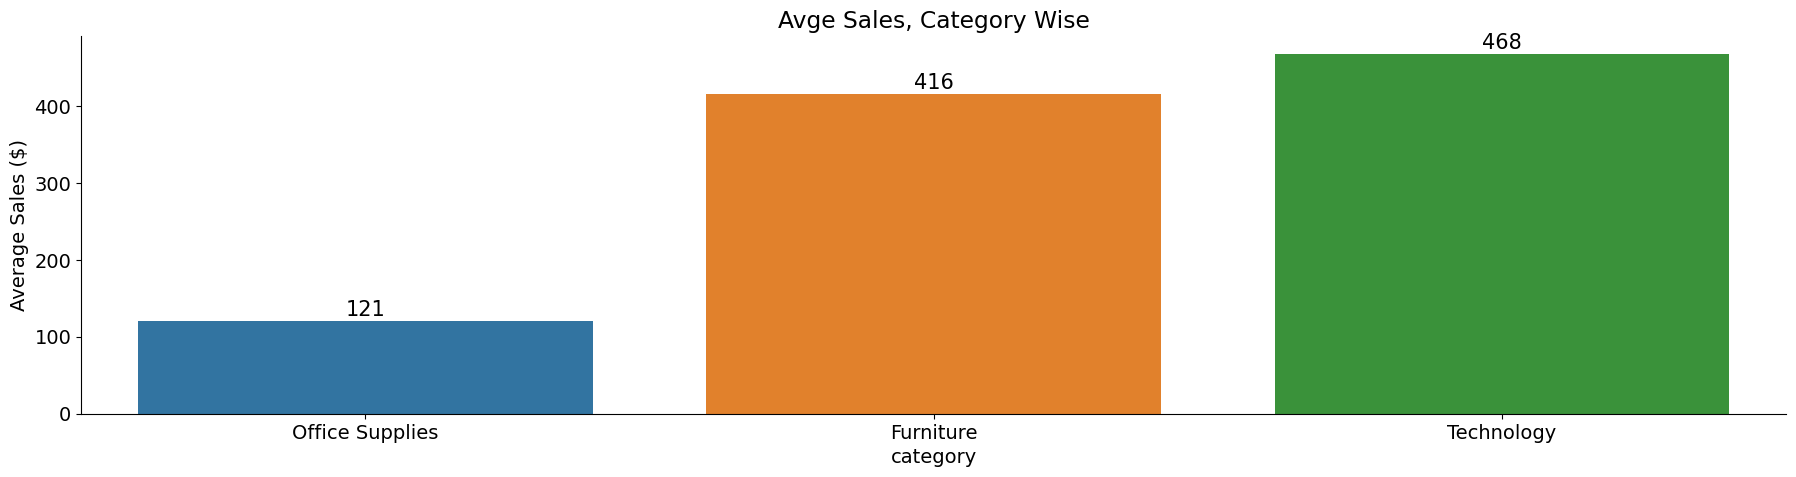

In [12]:
#creating a barplot
ax = sns.barplot(data=df, y='sales', x='category', ci=None)

#remove the top and right spine of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Adding the title to the plot
plt.title('Avge Sales, Category Wise')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
    
#adding y axis labels    
plt.ylabel('Average Sales ($)')
plt.show()

**Observations**

- In Technology Category, Average Sales is the highest while the same is the least in Office Supplies.

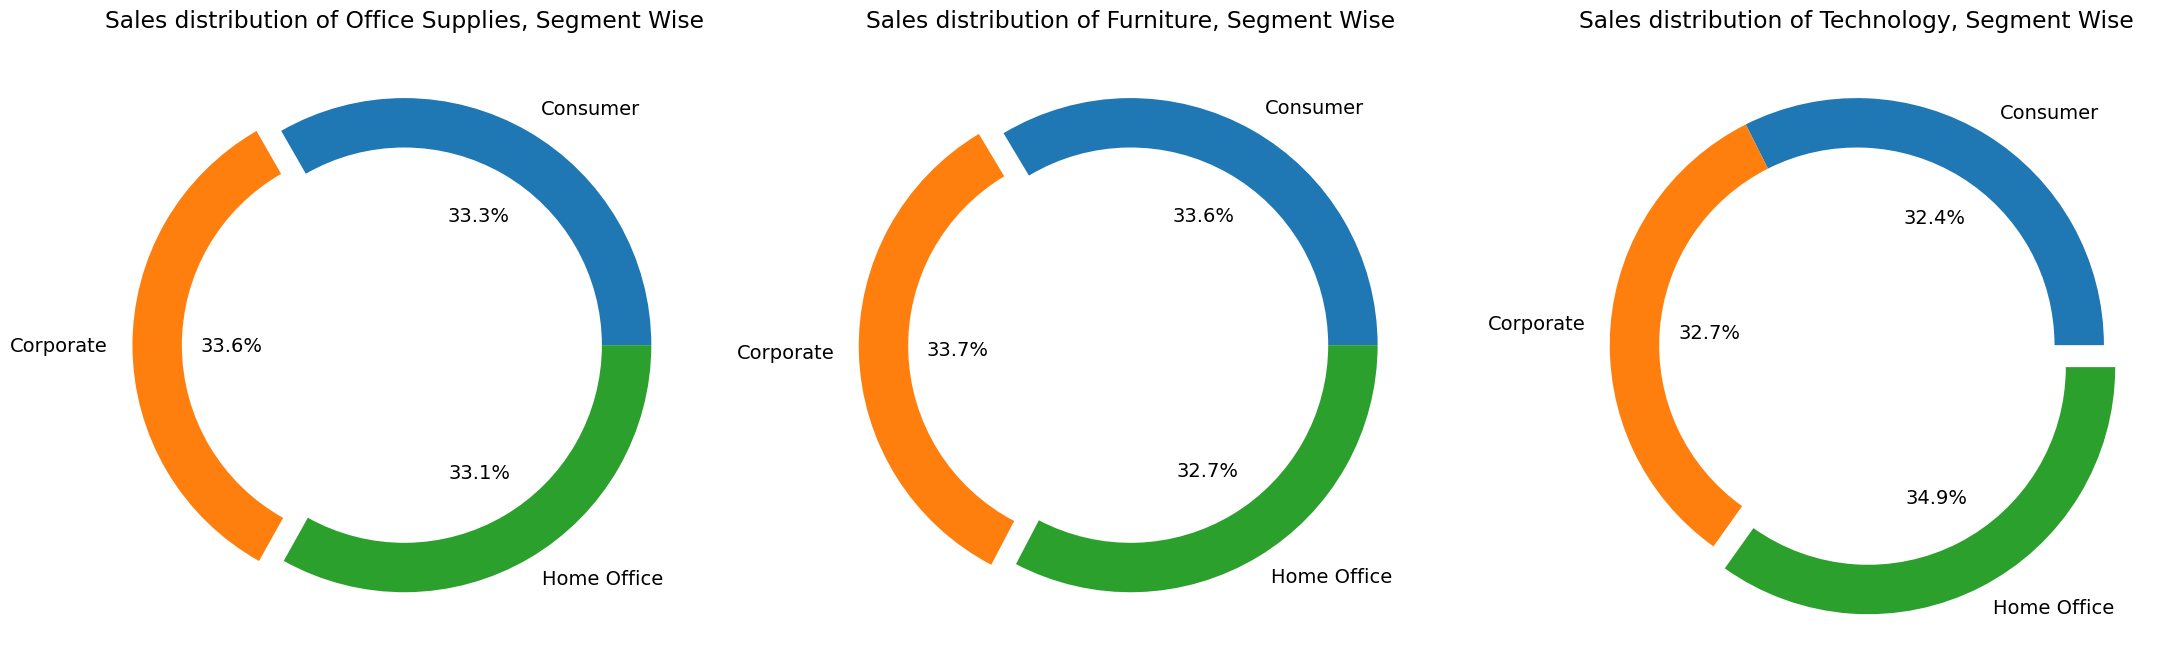

In [13]:
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,15))

#Creating a list of the unique categories
categories = list(df['category'].unique())


#Loopping through the categories list
for i in categories:
    plt.subplot(a, b, c) 
    
    #setting the criteria for dynamically exploding the pie plot
    list1 = list(df[df['category']==i].groupby('segment').mean()['sales'])
    max_val=max(list1)
    max_index=list1.index(max_val)
    
    #Setting the condition for exploding
    explode = [0.1 if num==max_index else 0 for (num,item) in enumerate(list1)]
    
    #PLotting the pie chart for each category grouped by segment and looking at the sales value
    df[df['category']==i].groupby('segment').mean()['sales'].plot(kind='pie',
                autopct='%1.1f%%', wedgeprops = dict(width=0.2), explode=explode)
    
    #Adding the title  and ylabel to the plot
    plt.title(f'Sales distribution of {i}, Segment Wise')
    plt.ylabel('')    
    
    #Increase the counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

**Observations**

- In Furniture Category, Corporate Segment is doing the best in terms of Sales and the worst in Home Office.
- In Office Supplies Category, Corporate Segment is doing the best in terms of Sales and the worst in Home Office.
- In Technology Category, Home Office Segment is doing the best in terms of Sales and the Consumer Segment seems to be doing the worst.

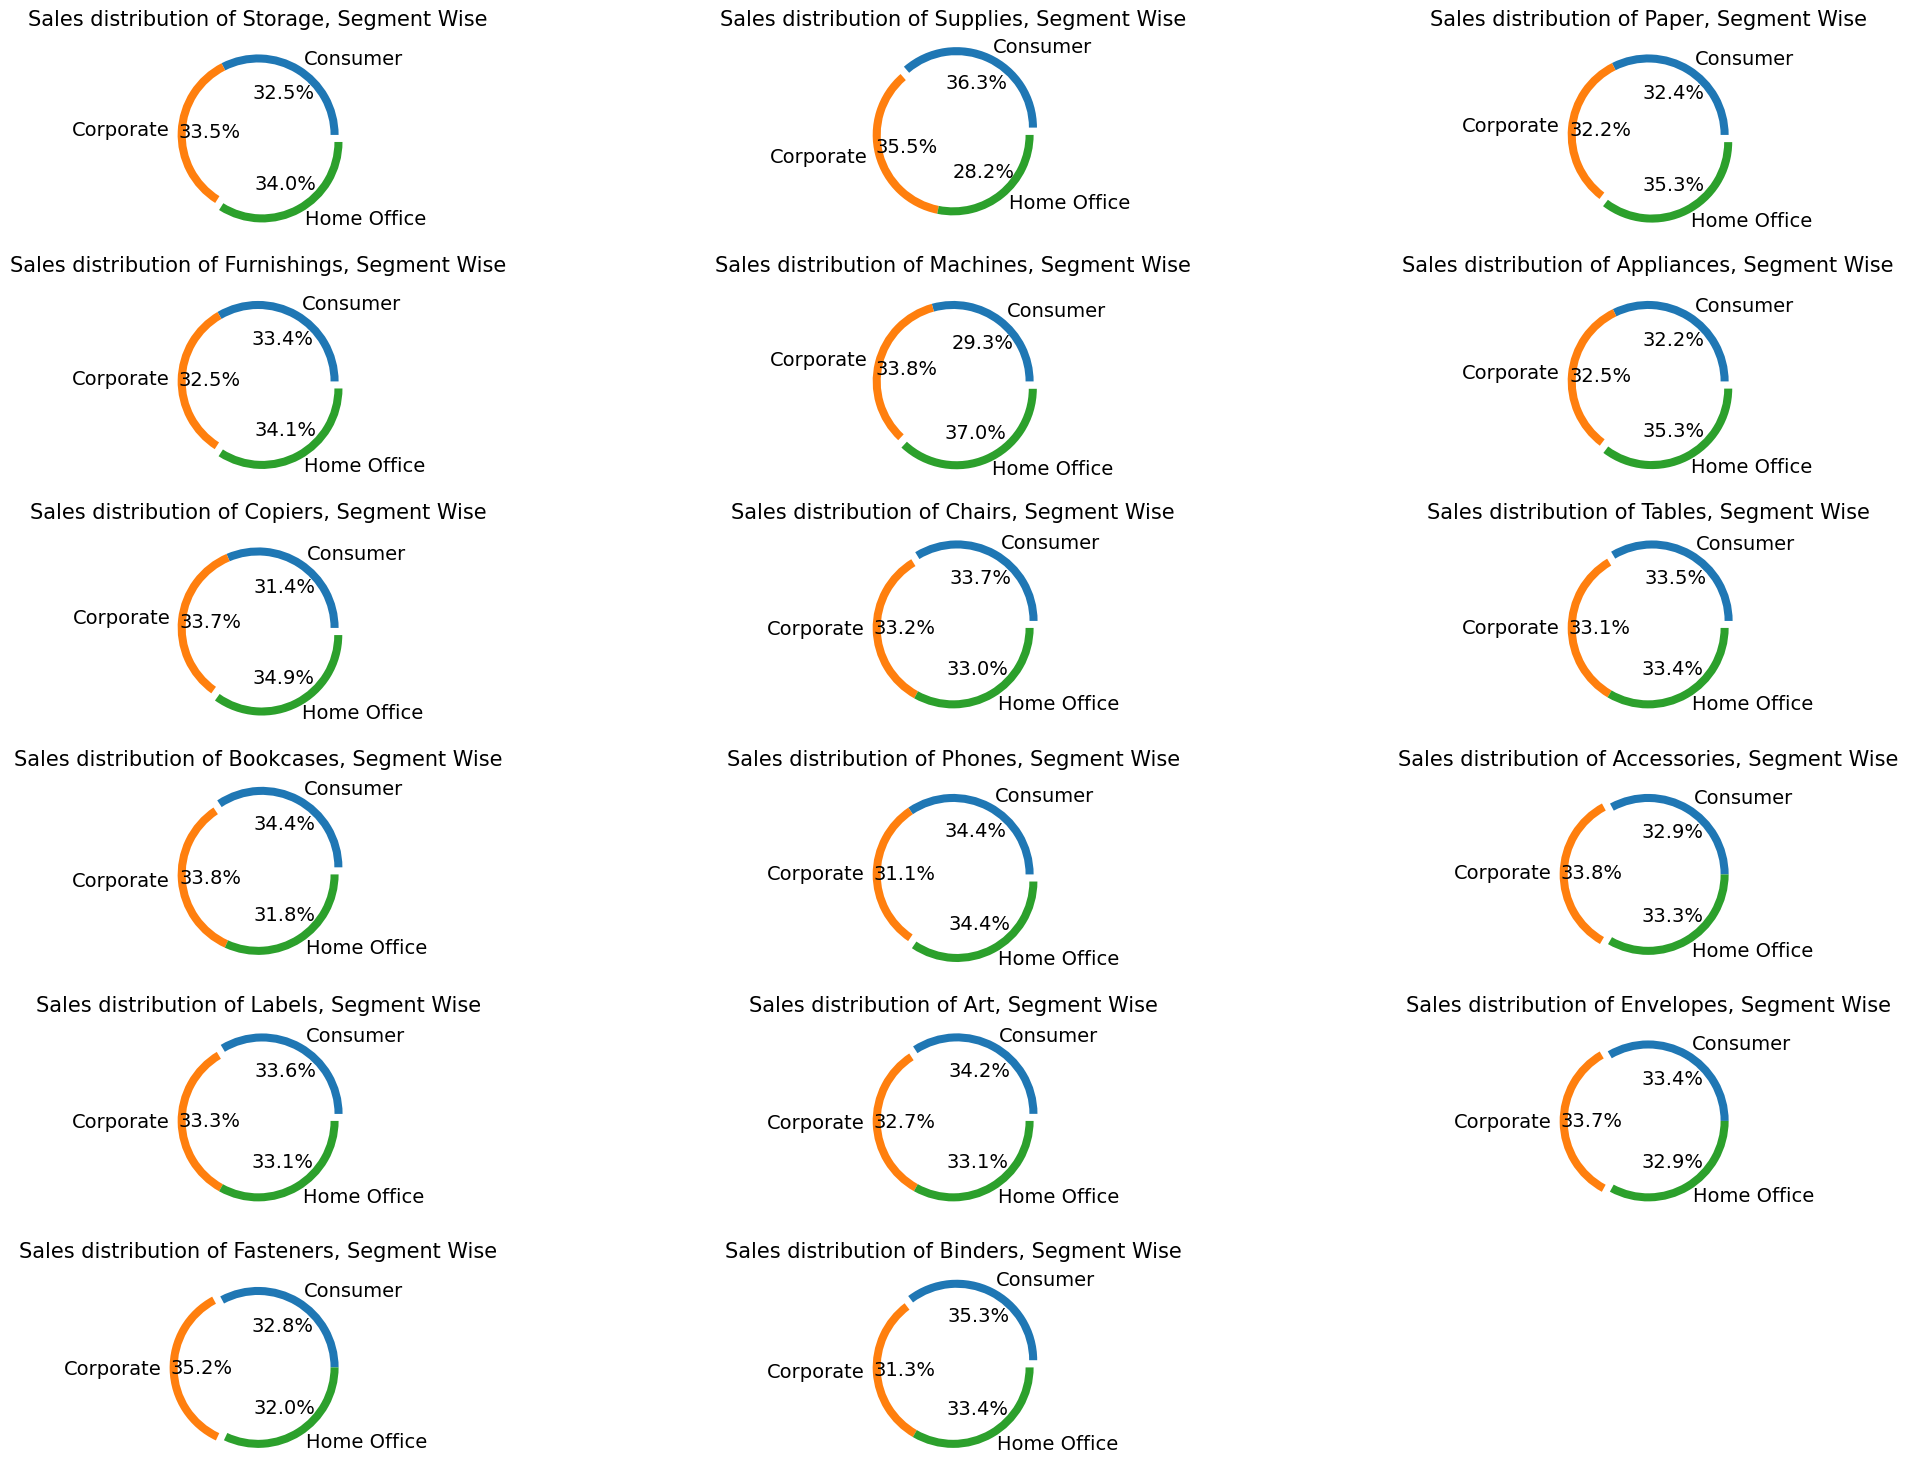

In [14]:
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,15))

#creating a list of the sub category
sub_category = list(df['sub_category'].unique())

#Looping through the subcategories
for i in sub_category:
    plt.subplot(a, b, c) 
    
    #setting the criteria for dynamically exploding the pie plot
    list1 = list(df[df['sub_category']==i].groupby('segment').mean()['sales'])
    max_val=max(list1)
    max_index=list1.index(max_val)
    
    #Setting the condition for exploding
    explode = [0.1 if num==max_index else 0 for (num,item) in enumerate(list1)]
    
    #PLotting the pie chart for each sub category grouped by segment and looking at the sales value
    df[df['sub_category']==i].groupby('segment').mean()['sales'].plot(kind='pie', 
                autopct='%1.1f%%', wedgeprops = dict(width=0.1), explode=explode)
    
    #adding the title and y axis label to the chart
    plt.title(f'Sales distribution of {i}, Segment Wise', fontsize=15)
    plt.ylabel('')    
    
    #Increase the counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

**Observations**

- In Consumer Segment, Supplies sub category has the highest sales.
- In Corporate Segment, sales of Supplies and Fasteners is the highest.
- In Home Office Segment, Sales of Machines is the highest

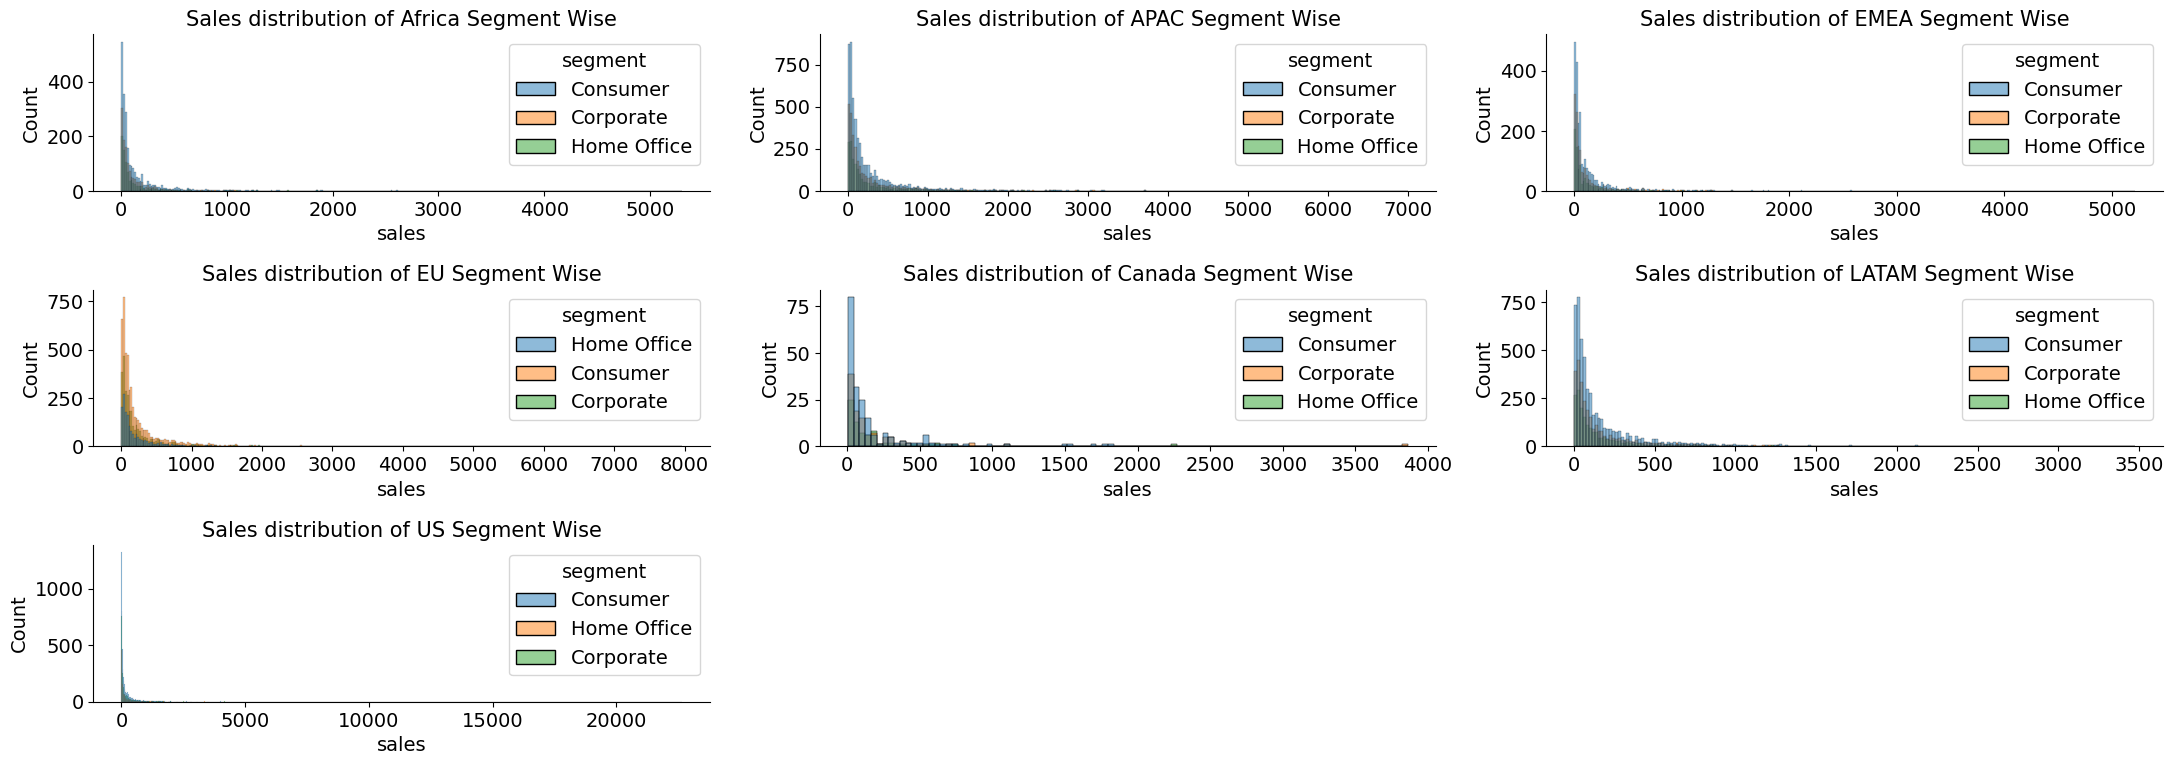

In [15]:
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,15))

#creating a list of the unique markets
markets = list(df.market.unique())

#Looping through the list of market names
for i in markets:
    plt.subplot(a, b, c)    
    
    #creating a histplot for each market using the sales value and coloring for each segment
    sns.histplot(data = df[df.market==i], x='sales', hue='segment')
    
    #Adding the title and y-axis label to the chart
    plt.title(f'Sales distribution of {i} Segment Wise', fontsize=15)
    plt.ylabel('Count') 
    
    #removing the top and right spines of the chart
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #Increasing the counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

In [16]:
#creating a list of unique segments
segments = list(df.segment.unique())

#creating a list of unique markets
markets = list(df.market.unique())

#Looping through the markets
for i in markets:
    print(' ')
    print(' ')
    
    #Printing the mean sales value for each market and rounding off the value to 2 decimals
    print(f'{i} Market Sales Mean : {round(df[df.market==i].sales.mean(),2)}')
    
    #Looping through the segments for each market
    for j in segments:
        
        #Calculating the sales mean for each market and segment combo
        mean = round(df[(df.market ==i ) & (df.segment == j)]['sales'].mean(),2)
        
        #Printing the mean calculated above
        print(f'{i} {j} Sales Mean : {mean}', end= ' ')

 
 
Africa Market Sales Mean : 170.87
Africa Consumer Sales Mean : 177.97 Africa Home Office Sales Mean : 173.46 Africa Corporate Sales Mean : 156.21  
 
APAC Market Sales Mean : 325.93
APAC Consumer Sales Mean : 318.79 APAC Home Office Sales Mean : 341.86 APAC Corporate Sales Mean : 328.51  
 
EMEA Market Sales Mean : 160.31
EMEA Consumer Sales Mean : 160.27 EMEA Home Office Sales Mean : 162.34 EMEA Corporate Sales Mean : 159.19  
 
EU Market Sales Mean : 293.81
EU Consumer Sales Mean : 294.98 EU Home Office Sales Mean : 281.16 EU Corporate Sales Mean : 299.0  
 
Canada Market Sales Mean : 174.3
Canada Consumer Sales Mean : 176.82 Canada Home Office Sales Mean : 165.22 Canada Corporate Sales Mean : 175.63  
 
LATAM Market Sales Mean : 210.29
LATAM Consumer Sales Mean : 213.1 LATAM Home Office Sales Mean : 200.79 LATAM Corporate Sales Mean : 211.36  
 
US Market Sales Mean : 229.87
US Consumer Sales Mean : 223.75 US Home Office Sales Mean : 240.98 US Corporate Sales Mean : 233.84 

**Observations**

- The top Market in terms of Sales is APAC where Home Office Segment is the top in Sales.
- The bottom Market in terms of Sales is EMEA where Corporate Segment is the top in Sales.

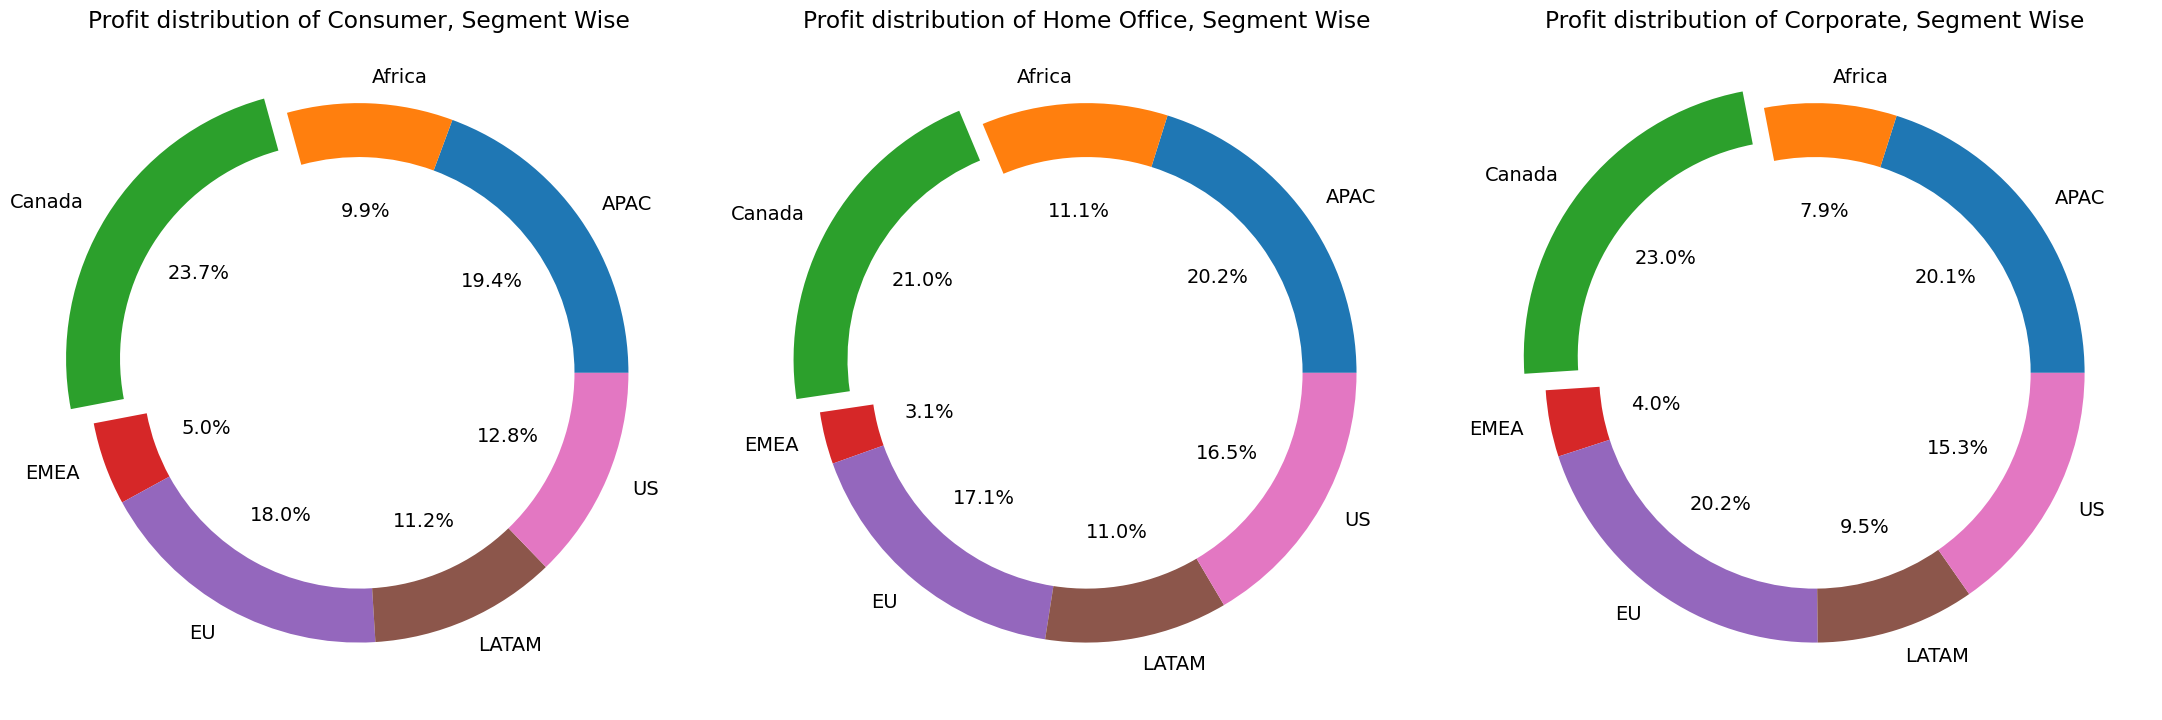

In [17]:
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,15))

#creating the list of the segments
segments = list(df['segment'].unique())

#looping through the segments
for i in segments:
    plt.subplot(a, b, c)   
    
    #setting the criteria for dynamically exploding the pie plot
    list1 = list(df[df['segment']==i].groupby('market').mean()['profit'])
    max_val=max(list1)
    max_index=list1.index(max_val)
    
    
    #Setting the condition for exploding using list comprehension
    explode = [0.1 if num==max_index else 0 for (num,item) in enumerate(list1)]
    df[df['segment']==i].groupby('market').mean()['profit'].plot(kind='pie', 
                autopct='%1.1f%%', wedgeprops = dict(width=0.2), explode=explode)
    
    #adding the title and ylabel to the chart
    plt.title(f'Profit distribution of {i}, Segment Wise')
    plt.ylabel('') 
    
    #Increasing counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

**Observations**

- The markets that are giving the highest profit in descending order are Canada, APAC and EU.
- The markets that are giving the lowest profit in ascending order are EMEA, Africa and LATAM.

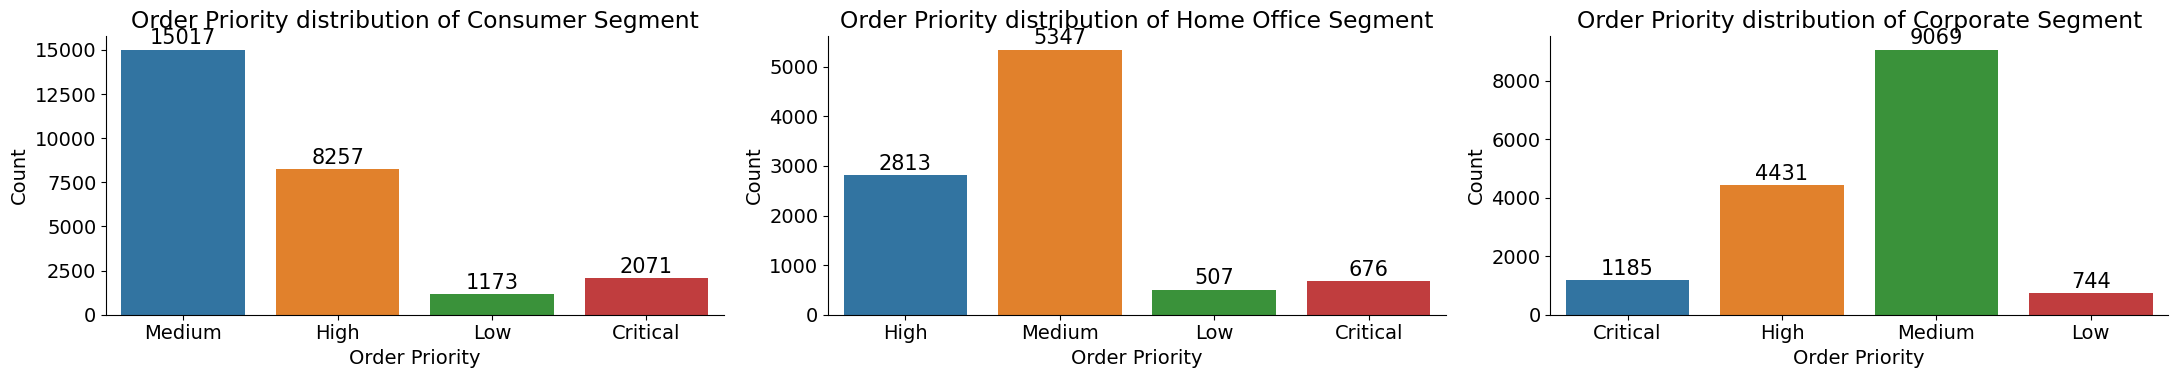

In [18]:
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,4))

#Creating a list of the unique segments
segments = list(df['segment'].unique())

for i in segments:
    plt.subplot(a, b, c) 
    
    #Creating a countplot for each segments's order priority
    ax = sns.countplot(data=df[df.segment==i], x='order_priority')
    
    #remove the top and right spines of the chart
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #adding the title, y-axis and x-axis label
    plt.ylabel('Count') 
    plt.xlabel('Order Priority')
    plt.title(f'Order Priority distribution of {i} Segment')
    
    #adding data labels
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
        
    #Increasing the counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

**Observations**

- Consumer Segment gets the Medium Priority Orders the most followed by High Priority.
- Home Office Segment gets the Medium Priority Orders the most followed by High Priority.
- Corporate Segment gets the Medium Priority Orders the most followed by High Priority.

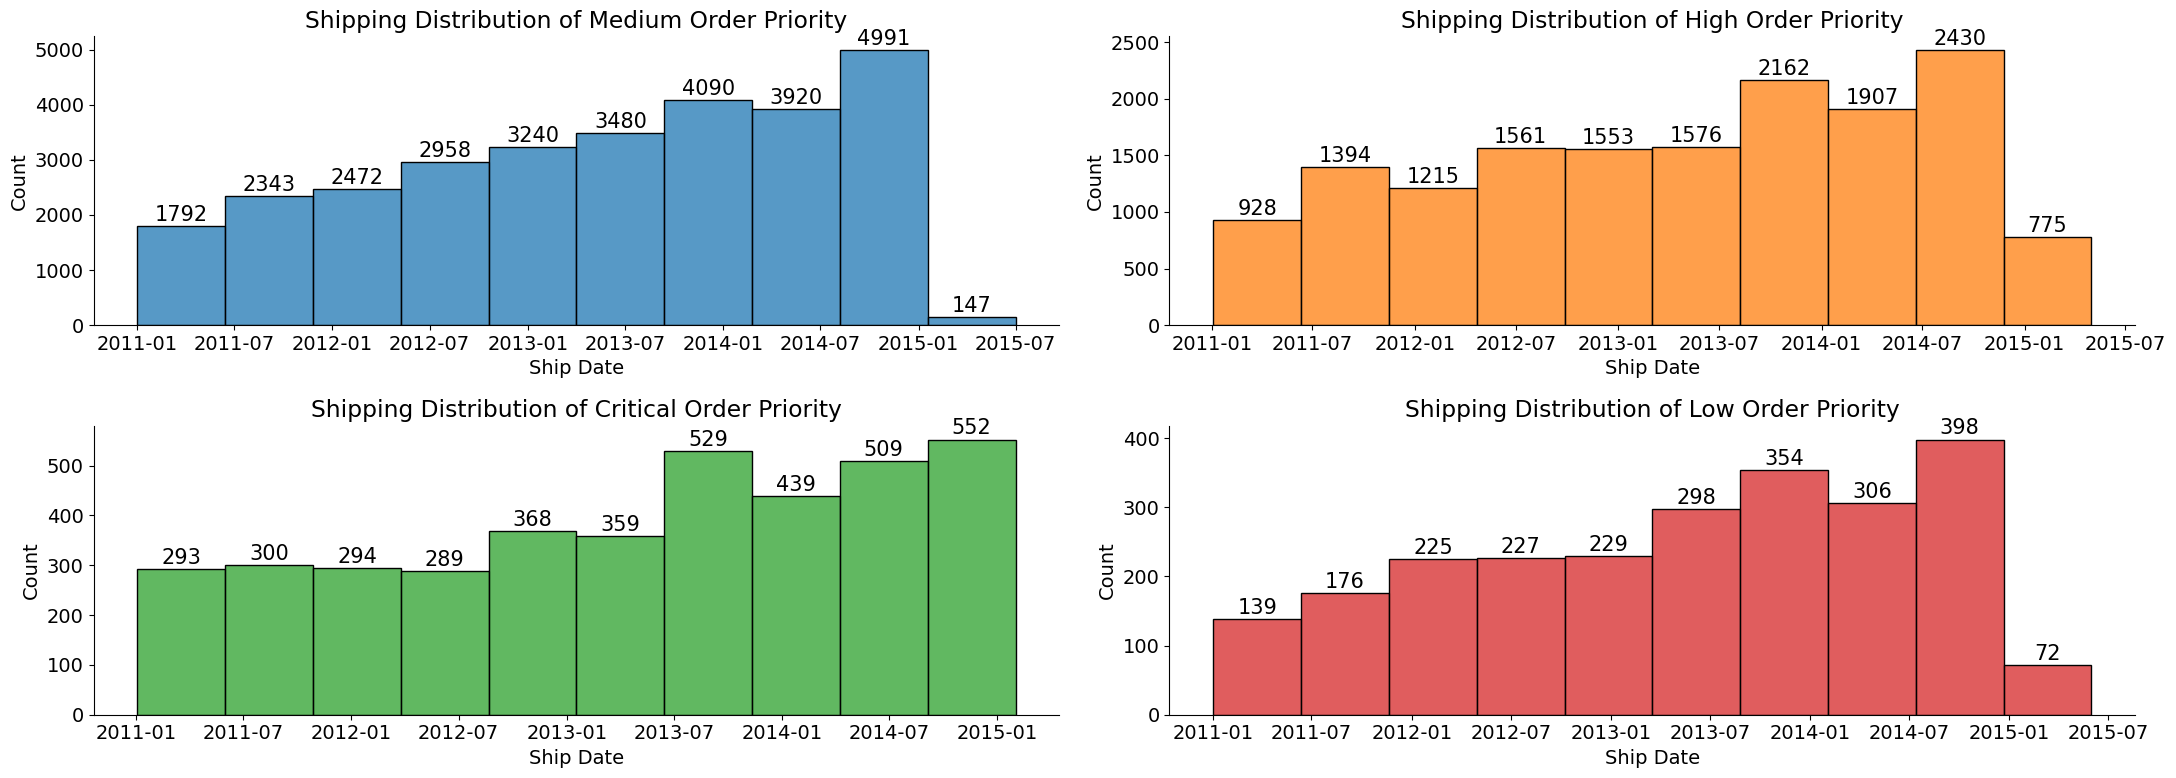

In [19]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

#Accessing the colors that cycles through the list of colors
colors = plt.rcParams["axes.prop_cycle"]()

#Set the figure size of the plot
fig = plt.figure(figsize=(22,8))

#creating a list of the unique order priorities
priorities = list(df['order_priority'].unique())

#Looping through the list of priorities
for i in priorities:
    plt.subplot(a, b, c)  
    
    #changing the color at every iteration
    color = next(colors)["color"]
    
    #Creating a histogram of the ship date values for each order priority
    ax = sns.histplot(df[df['order_priority']==i]['ship_date'], bins=10, color=color)
    
    #remove the top and right spines of the chart
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #adding the title, y-axis and x-axis labels to the chart
    plt.title(f'Shipping Distribution of {i} Order Priority')
    plt.ylabel('Count') 
    plt.xlabel('Ship Date')
    
    #adding data labels
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', 
                    va='center',size=15, xytext=(0, 8),textcoords='offset points')
        
    #Increasing the counter value    
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()

#Show the plot
plt.show()

**Observations**

- Max orders got shipped between 2014 July and 2015 January for Medium High and Low Priority Orders.
- Max orders got shipped between 2013 July and 2014 January for Critical Priority Orders.

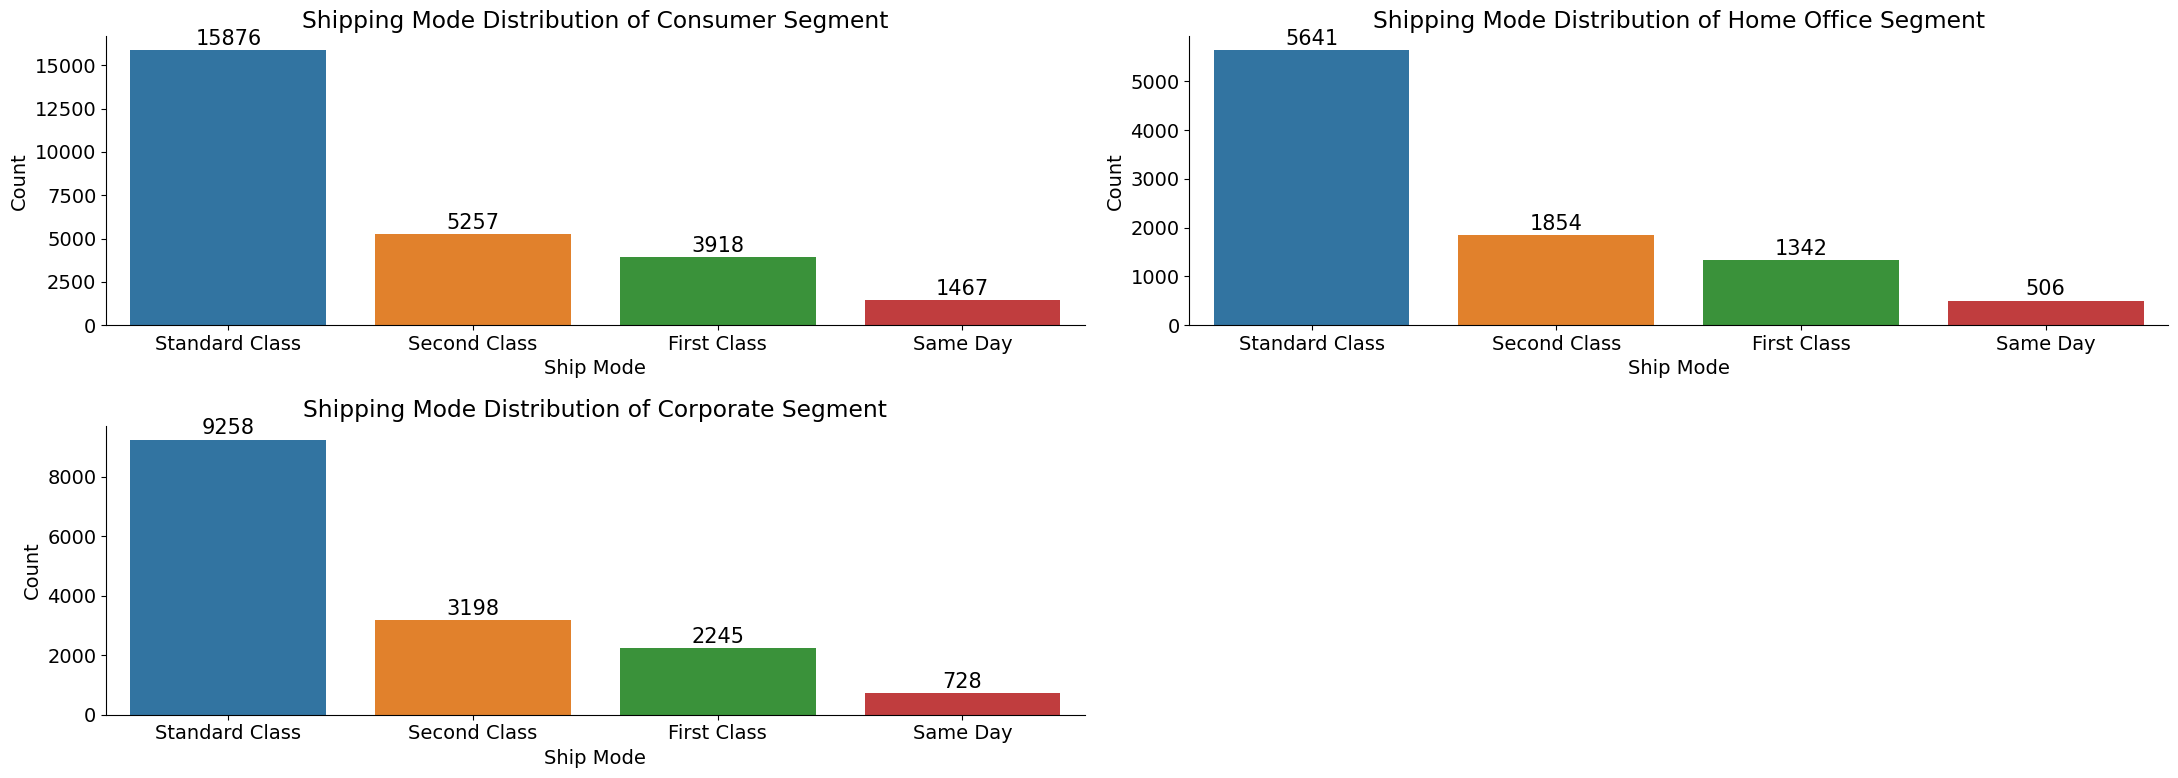

In [20]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,8))

#Creating a list of the unique segments
segments = list(df['segment'].unique())

#looping through the segments
for i in segments:
    plt.subplot(a, b, c)  
    
    #Creating a countplot for each segment's shipping mode and order by value counts
    ax = sns.countplot(df[df.segment==i]['ship_mode'], order=df['ship_mode'].value_counts().index)
    
    #Removing the top and right spines of the chart
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #setting x axis ticks rotation to zero
    plt.xticks(rotation=0)
    
    #adding the title, x-axis label, and y-axis label
    plt.title(f'Shipping Mode Distribution of {i} Segment')
    plt.xlabel('Ship Mode')
    plt.ylabel('Count') 

    #adding Data labels to the bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', 
                    va='center',size=15, xytext=(0, 8),textcoords='offset points')
        
    #Increasing the counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()

#Show the plot
plt.show()

**Observations**

- Standard Class shippings are being done the most while the same day shipping is the least in all three segments.

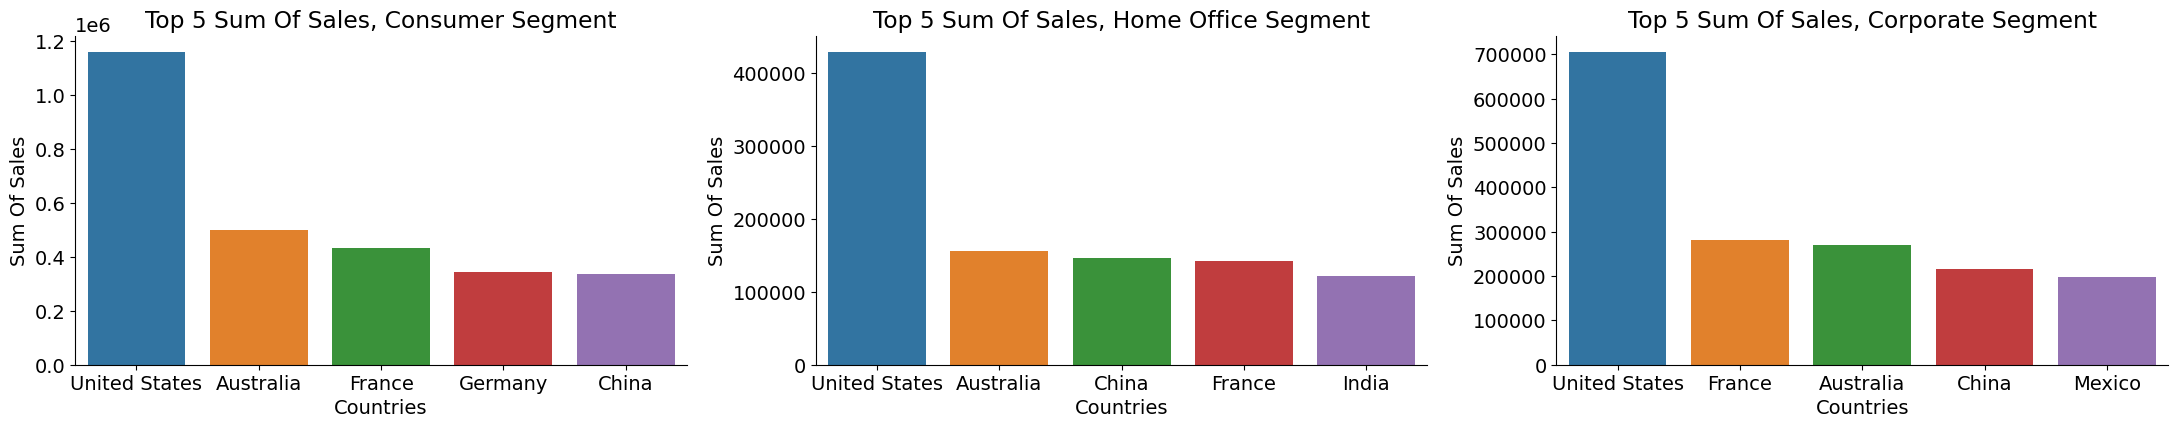

In [21]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,8))

#creating a list of the segments
segments = list(df['segment'].unique())

#looping through the segments
for i in segments:
    plt.subplot(a, b, c)  
    
    #Creating a temp_df by grouping the data by country and getting the sum and sort values by sales and getting top 5 country
    temp_df = df[df.segment==i].groupby('country').sum().sort_values(by='sales', ascending=False)[:5]
    
    #getting the length  of the dataframe
    length = len(temp_df)
    
    #creating a barplot and plotting sales
    ax = sns.barplot(data=temp_df, x=temp_df.index, y='sales')
    
    #Removing the top and right spines of the chart
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #Setting the x axis labels rotation to zero
    plt.xticks(rotation=0)
    
    #adding x axis label, title and y-axis label
    plt.xlabel('Countries')
    plt.title(f'Top {length} Sum Of Sales, {i} Segment')
    plt.ylabel('Sum Of Sales') 
    
    #Increasing counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

**Observations**

- United States is the top country in all the three Segments.

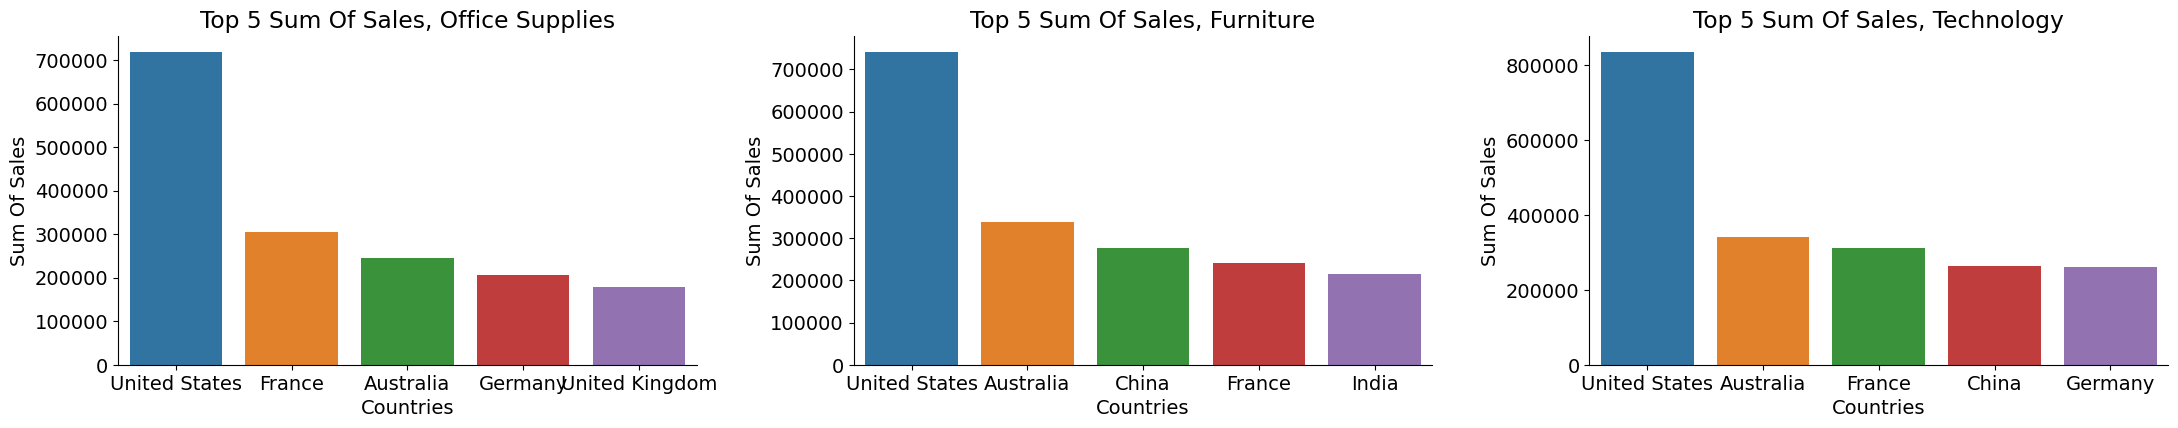

In [22]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,8))

#Creating a list of categories
categories = list(df['category'].unique())

#Iterate through the list of categories
for i in categories:
    plt.subplot(a, b, c) 
    
    #creating a temp_df grouped by country and sorting in descending order by sales column to get top 5 values
    temp_df = df[df.category==i].groupby('country').sum().sort_values(by='sales', ascending=False)[:5]
    
    #getting the length of the temp_df DataFrame
    length = len(temp_df)
    
    #Plotting a barplot 
    sns.barplot(data=temp_df, x=temp_df.index, y='sales')
    
    #Remove the top and right spine of the chart
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #rotating ticks of the x axis
    plt.xticks(rotation=0)
    
    #Adding x-axis label, y-axis label and title to the chart
    plt.xlabel('Countries')
    plt.title(f'Top {length} Sum Of Sales, {i}')
    plt.ylabel('Sum Of Sales')   
    
    #Increasing the counter value by 1
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()

#Show the plot
plt.show()

**Observations**

- United States is the country with the highest sum of sales in all three categories.

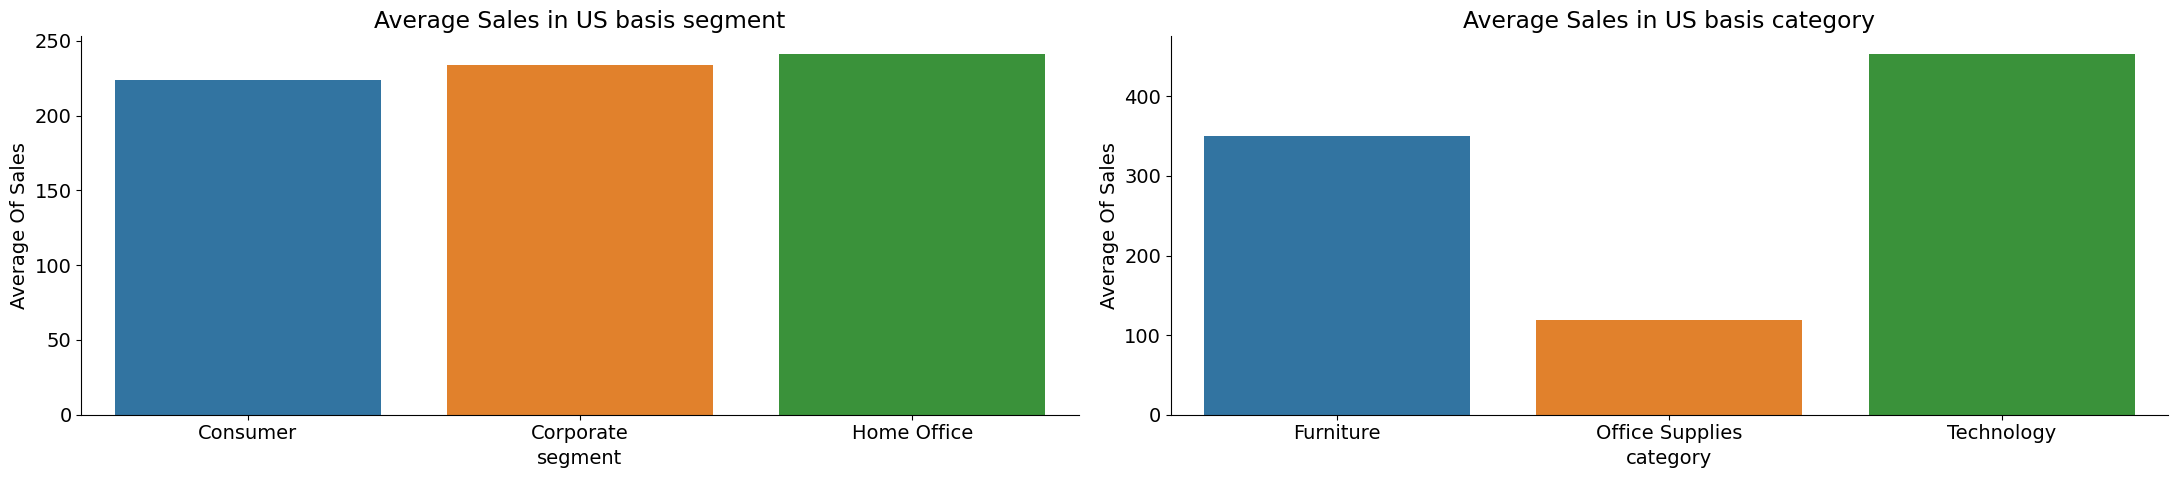

In [23]:
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(22,5))

#Creating a list of columns for which we want the loop to go through
conditions = ['segment', 'category']

#Looping through the conditions mentioned above
for i in conditions:
    plt.subplot(a, b, c)   
    
    #Creating a temp_df dataframe for the United States grouped by segment and category
    temp_df = df[df.country=='United States'].groupby(i).mean()
    
    #getting the length of the temp_df DataFrame
    length = len(temp_df)
    
    #Plotting a barplot 
    sns.barplot(data=temp_df, x=temp_df.index, y='sales')
    
    #Remove the top and right spine of the chart
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    #rotating ticks of the x axis
    plt.xticks(rotation=0)
    
    #Adding y axis label and title to the chart
    plt.title(f'Average Sales in US basis {i}')
    plt.ylabel('Average Of Sales')  
    
    #Increase the counter value
    c = c + 1   
    
#Adjust the layout of the plot
plt.tight_layout()

#Show the plot
plt.show()

**Observations**

- Average Sales in Office Supplies Category is the least in the US while its the highest in Technology Category.
- Average Sales in Consumer Segment is the least in the US while its the highest in Home Office Category.

Thanks for going through the notebook.Please let me know in the comments section what I can improve the next time.